# Advanced EDA Data Preprocessing

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from statistics import mode

In [36]:
# Loading src directory
sys.path.insert(1,'../src/')

In [2]:
# Loading data set
titanic_data = pd.read_csv('../data/titanic.csv')

In [3]:
# Displaying the data
titanic_data.head(n = 5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Displaying number of rows and columns
titanic_data.shape

(891, 12)

In [5]:
#Displaying infos about the dataset
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#Describing the dataset
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Continuous Variables
- Age
- Fare

### Discrete Variables 
- PassangerID
- Survived
- Pclass
- SibSp
- Parch

 ### Categorical Variables 
- Sex
- Cabin
- Embarked

### ID Variables 
- PassangerID
-  Ticket
-  Name



## Working with Categorical Data

<Axes: xlabel='Sex', ylabel='count'>

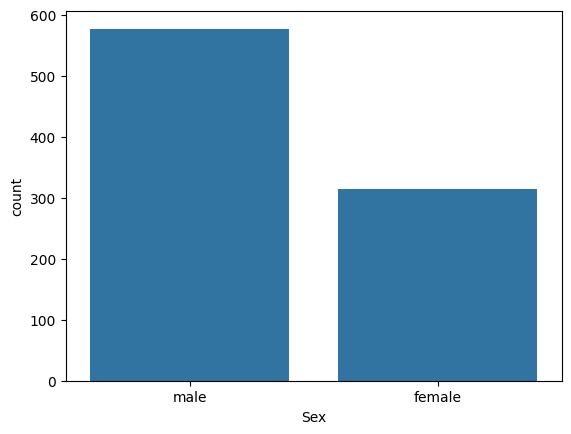

In [10]:
#Countplot for Sex class 
sns.countplot(x = 'Sex', data = titanic_data)

<Axes: xlabel='Cabin', ylabel='count'>

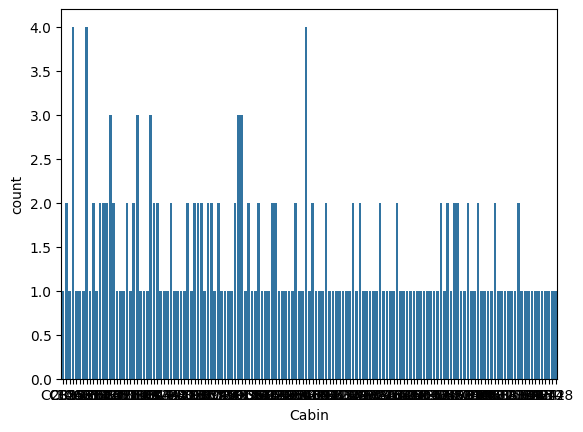

In [12]:
#Countplot for Ticket class 
sns.countplot(x = 'Cabin', data = titanic_data)

<Axes: xlabel='Embarked', ylabel='count'>

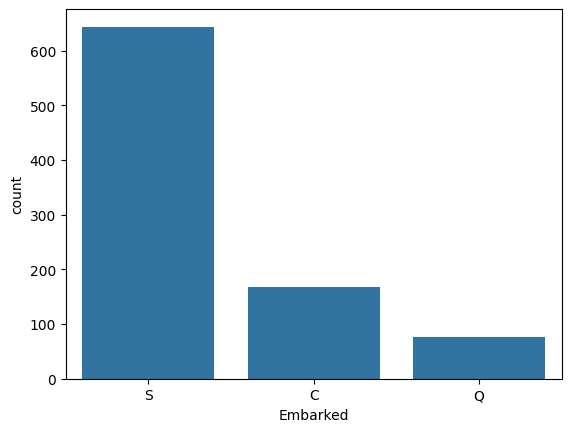

In [13]:
#Countplot for Ticket class 
sns.countplot(x = 'Embarked', data = titanic_data)

In [24]:
# Relationship between 'Sex' and 'Survived'
ct1 = pd.crosstab(titanic_data['Sex'], titanic_data['Survived'])
ct1

Survived,0,1
Sex,,
female,81,233
male,468,109


<Axes: xlabel='Survived', ylabel='Sex'>

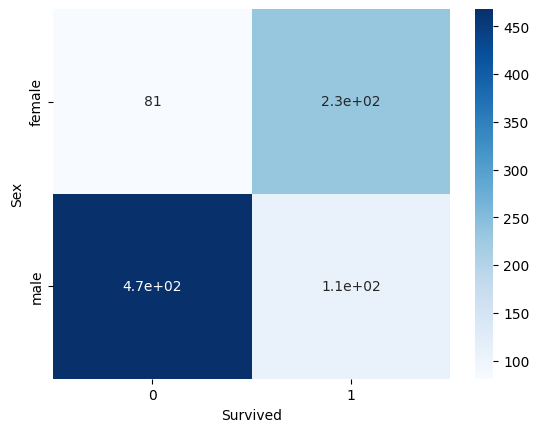

In [25]:
sns.heatmap(ct1, annot= True, cmap= 'Blues')

Women had the higher survival rate

## Investigating Outliers

In [38]:
#importing IQR module
import interQuatileRange as iqr

In [41]:
age_iqr = iqr.iqr(titanic_data, 'Age')
outliers = titanic_data[(titanic_data['Age'] < (Q1 - 1.5 * age_iqr)) |
(titanic_data['Age'] > (Q3 + 1.5 * age_iqr))]
outliers

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
456,457,0,1,"Millet, Mr. Francis Davis",male,65.0,0,0,13509,26.5500,E38,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
